#Самые прибыльные мобильные игры



Это набор данных о мобильных видеоиграх, валовой доход которых составил не менее 100 миллионов долларов. 

Из АД мы узнаем:
* TOP-5 игр по выручке
* Сколько "стоит" каждый жанр
* Какой год является самым прибыльным 
* В каком году было больше всего релизов

Табличные данные включают:
* `Game` - Игра

* `Revenue` - Доход

* `Initial release` - Первоначальный релиз

* `Publisher(s)` - Издатель(и)

* `Genre(s)` - Жанр(ы)

#Загрузка данных

Импортируем библитотеки и предосталавенный нам файл real_estate_data.csv

https://drive.google.com/file/d/1RXdwFJgpJCi25LR44vC9I9ZbY0dfwzM-/view?usp=share_link

In [1]:
! gdown --id 1RXdwFJgpJCi25LR44vC9I9ZbY0dfwzM-

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RXdwFJgpJCi25LR44vC9I9ZbY0dfwzM-
To: /content/mobile-games.csv
100% 7.11k/7.11k [00:00<00:00, 9.16MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('/content/mobile-games.csv')

Для начала ознакомимся с данными

In [4]:
df.head(10)

,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy
5,Pokémon Go,7760000000,2016-07-06,Niantic / The Pokémon Company,Augmented reality
6,Candy Crush Saga,7456000000,2012-11-14,King (Activision Blizzard),Puzzle
7,Fate/Grand Order,6300000000,2015-07-30,Aniplex (Sony Music Entertainment Japan),RPG
8,Fantasy Westward Journey,4700000000,2015-03-26,NetEase,MMORPG
9,Garena Free Fire,4330000000,2017-12-04,Garena,Battle royale


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             104 non-null    object
 1   Revenue          104 non-null    int64 
 2   Initial release  104 non-null    object
 3   Publisher(s)     104 non-null    object
 4   Genre(s)         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [43]:
df.describe()

,revenue
count,1.040000e+02
mean,1.617105e+09
std,2.454735e+09
min,1.000000e+08
25%,2.407500e+08
50%,7.426000e+08
75%,1.525000e+09
max,1.466750e+10


Имеем 104 строки и 5 колонок. Пропусков нету.

Исправим название колонок.


In [6]:
df = df.rename(columns={"Game": "game", "Revenue": "revenue", 
                        "Initial release": "initial_release", 
                        "Publisher(s)": "publisher",
                        "Genre(s)": "genre"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game             104 non-null    object
 1   revenue          104 non-null    int64 
 2   initial_release  104 non-null    object
 3   publisher        104 non-null    object
 4   genre            104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


`initial_release` переведем в формат даты (год-месяц-число)

In [8]:
df["initial_release"] = pd.to_datetime(df["initial_release"], format="%Y-%m-%d")
df.head()

,game,revenue,initial_release,publisher,genre
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy


**TOP-5 игр по выручке**

In [9]:
df.sort_values("revenue", ascending=False).head(5)

,game,revenue,initial_release,publisher,genre
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy


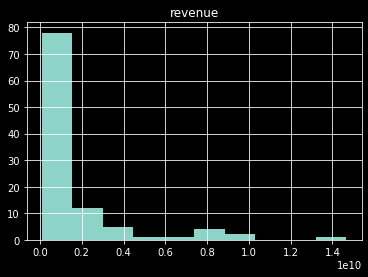

In [10]:
df.hist("revenue")
plt.show()

5 лучших игр по доходу являются: 
* Honor of Kings / Arena of Valo
* Monster Strike
* PUBG Mobile
* Puzzle & Dragons
* Clash of Clans

Так же на гистограмме мы можем увидеть, что большенство игр имеет доход менее 5000000000$

**Стоимость каждого жанра**

In [ ]:
df.groupby("genre").sum().sort_values(by = "revenue", ascending=False)

**Прибыль по годам**

Создадим новую колонку `initial_release_year` в которой будет указан Год релиза каждый игры.

In [40]:
df["initial_release_year"] = df["initial_release"].dt.to_period("Y")

In [41]:
df["initial_release_year"]

0      2015
1      2013
2      2018
3      2012
4      2012
       ... 
99     2017
100    2020
101    2015
102    2017
103    2018
Name: initial_release_year, Length: 104, dtype: period[A-DEC]

In [42]:
df.groupby("initial_release_year").sum().sort_values(by = "revenue", ascending=False)

,revenue
initial_release_year,
2015,36954600000
2012,31318440000
2016,24133510000
2018,19222000000
2017,17065720000
2013,13800000000
2014,9037200000
2019,8845920000
2020,5101590000


Мы видим, что в 2015 и 2012 являются самыми прибыльными для компаний.


**Год релизов**

Давайте посмотрим в каком году было больше всего релизов:

In [47]:
df["initial_release_year"].value_counts()

2016    16
2015    15
2018    15
2017    14
2019    10
2014     9
2012     8
2020     8
2013     3
2021     3
2011     2
2010     1
Freq: A-DEC, Name: initial_release_year, dtype: int64

В 2016 году было выпущено больше всего игр